# K-Means Clustering
K 평균 군집화 알고리즘  

군집의 중심이 되는 K개의 seed 점들을 선택하여 그 seed 점과 거리가 가까운 개체들을 그룹화하는 방법

알고리즘

1. K개의 중심점을 임의로 배치한다.
2. 모든 자료와 K개의 중심점과 거리를 계산하여 가장 가까운 중심점의 군집으로 할당한다. 
3. 군집의 중심을 구한다. (평균을 구한다.)
4. 정지 규칙에 이를 때까지 2 ~ 3 단계를 반복한다. 
    - 군집의 변화가 없을 때
    - 중심점의 이동이 임계값 이하일 때

## K-Means 알고리즘 예제

Step1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Step2. Random Data 생성

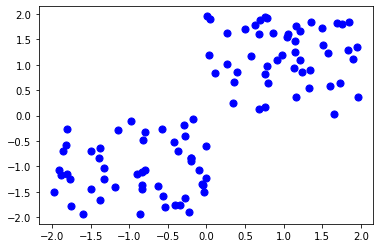

In [6]:
np.random.seed(1)
X = -2 * np.random.rand(100, 2)
X1 = 1 * 2*np.random.rand(50, 2)
X[50:100, :] = X1
plt.scatter(X[:,0], X[:, 1], s=50, c='b')
plt.show()

Step3. Scikit-Learn으로 K-Means를 선언하고 데이터 ㅇ녀결

In [7]:
model = KMeans(n_clusters=2)
model.fit(X)

/opt/conda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

Step4. 중심점(centroid)과 그래프 표시

[[-0.87829527 -1.06521644]
 [ 1.02078535  1.19805862]]
[-0.87829527 -1.06521644]


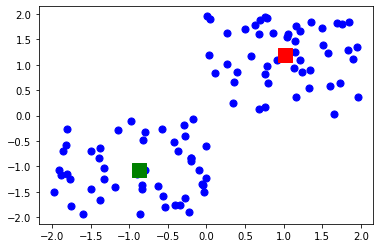

In [9]:
print(model.cluster_centers_)
print(model.cluster_centers_[0])
plt.scatter(X[:, 0], X[:, 1], s=50, c='b')
plt.scatter(model.cluster_centers_[0][0], model.cluster_centers_[0][1], s=200, c='g', marker='s')
plt.scatter(model.cluster_centers_[1][0], model.cluster_centers_[1][1], s=200, c='r', marker='s')
plt.show()

Step5. 알고리즘 테스트

In [10]:
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# make_blobs를 이용한 K-Means 실습

In [11]:
from sklearn.datasets import make_blobs

In [12]:
X, y = make_blobs(
    n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=0
)

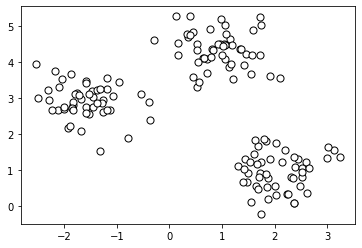

In [14]:
plt.scatter(
    X[:, 0],
    X[:, 1],
    c = 'white',
    marker='o',
    edgecolors='black',
    s=50
)

plt.show()

K-means를 이용하여 상기 Random data를 적용하고 분포를 이미지로 그려봅니다.

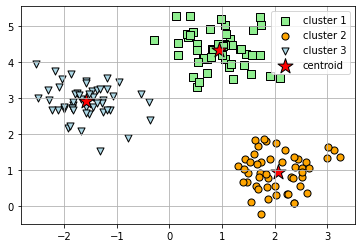

In [15]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0], X[y_km==0, 1], s=50, c='lightgreen', marker='s', edgecolors='black', label='cluster 1')
plt.scatter(X[y_km==1,0], X[y_km==1, 1], s=50, c='orange', marker='o', edgecolors='black', label='cluster 2')
plt.scatter(X[y_km==2,0], X[y_km==2, 1], s=50, c='lightblue', marker='v', edgecolors='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='*', c='red', edgecolors='black', label='centroid')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

K-Means의 단점은 최적의 Cluster 수인 K가 몇개의 클러스터가 최적인지 알 수 없고 직접 지정해야 한다는 것입니다.
만약 잘못된 cluster를 정하면 데이터 왜곡이 발생할 수 있습니다.

## Elbow Method
이를 보완하기 위해 Elbow Method는 매우 좋은 방법이 될 수 있습니다. 주어진 모델에 대한 최적 군집 수 K를 추정하는 데 유용한 그래픽 도구입니다.
Elbow Method의 개념은 왜곡이 가장 빠르게 감소하기 시작하는 K값을 식별하는 것입니다.

여기서는 Elbow의 기울기가 급격하게 줄어드는 3을 Cluster 갯수로 지정하면 됩니다.

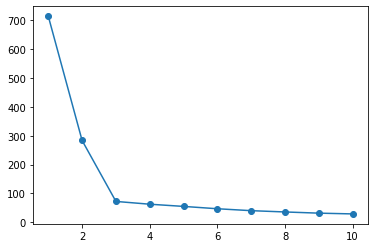

In [18]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        init='random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_) # Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

plt.plot(range(1,11), distortions, marker='o')

## Silhouette Score

실루엣 값은 개체가 다른 클러스터(seperation)에 비해 자신의 클러스터(cohesion)와 얼마나 유사한 지 측정합니다. 
실루엣 범위는 -1에서 +1까지이며, 값이 높으면 객체가 자체 클러스터와 잘 일치하고 인접 클러스터와 잘 일치하지 않음을 나타냅니다.
대부분의 개체에 높은 값이 있으면 클러스터링 구성이 적합합니다. 많은 포인트의 값이 낮거나 음수이면 클러스터링 구성에 클러스터가 너무 많거나 적을 수 있습니다.

아래의 예시는 가장 높은 슬루엣값이 있는 0.374에 매핑되는 클러스터 K=3이 적정하다는 것을 보여줍니다.

In [21]:
from sklearn.metrics import silhouette_score
import seaborn as sns

def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
    clusters_range = range(2, 15)
    results = []
    
    for i in clusters_range:
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter = param_max_iter, random_state=0)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])
        
    result = pd.DataFrame(results, columns=['n_clusters', 'silhouette_score'])
    pivot_km = pd.pivot_table(result, index='n_clusters', values='silhouette_score')
    
    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

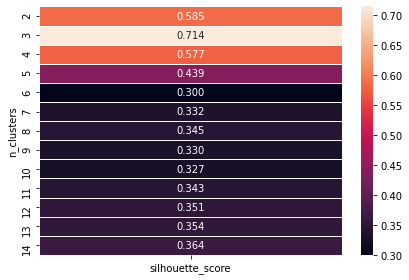

In [22]:
visualize_silhouette_layer(X)